## Initialization Cells

In [1]:
# Import libraries made for assignment
from poisson_equation_prepost import assemble_algebraic_system, post_process_solution
from linear_system_solver import solve_algebraic_system

# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Solution Workflow Example

## Problem Definiton
Solve the following partial differential equation:
$$\frac{\partial^2{u(x,y)}}{\partial x^2} + \frac{\partial^2{u(x,y)}}{\partial y^2} = g(x, y)$$

In the following domain:
$$\Omega = [0, 1] \times [0, 1]$$

Subject to the following boundary condition:
$$ \partial\Omega = 0 $$

## Define Problem Parameters

In [3]:
# Domain parameters
Lx = 1
Ly = 1

# Mesh parameters
grid_points_x = 61
grid_points_y = 61

# Boundary condition
boundary_condition = lambda x, y: 0

# Source term
g = lambda x, y: -8*(np.pi**2)*np.sin(2*np.pi*(x+y))

## Generate Algebraic System - Matrix $A$ and vector $b$

In [4]:
A, b = assemble_algebraic_system(Lx, Ly, grid_points_x, grid_points_y, g, boundary_condition)

## Solve Algebraic System $A \cdot u = b$

In [5]:
u = solve_algebraic_system(A, b, method="LU_compiled")

## Post Process Solution

<IPython.core.display.Javascript object>


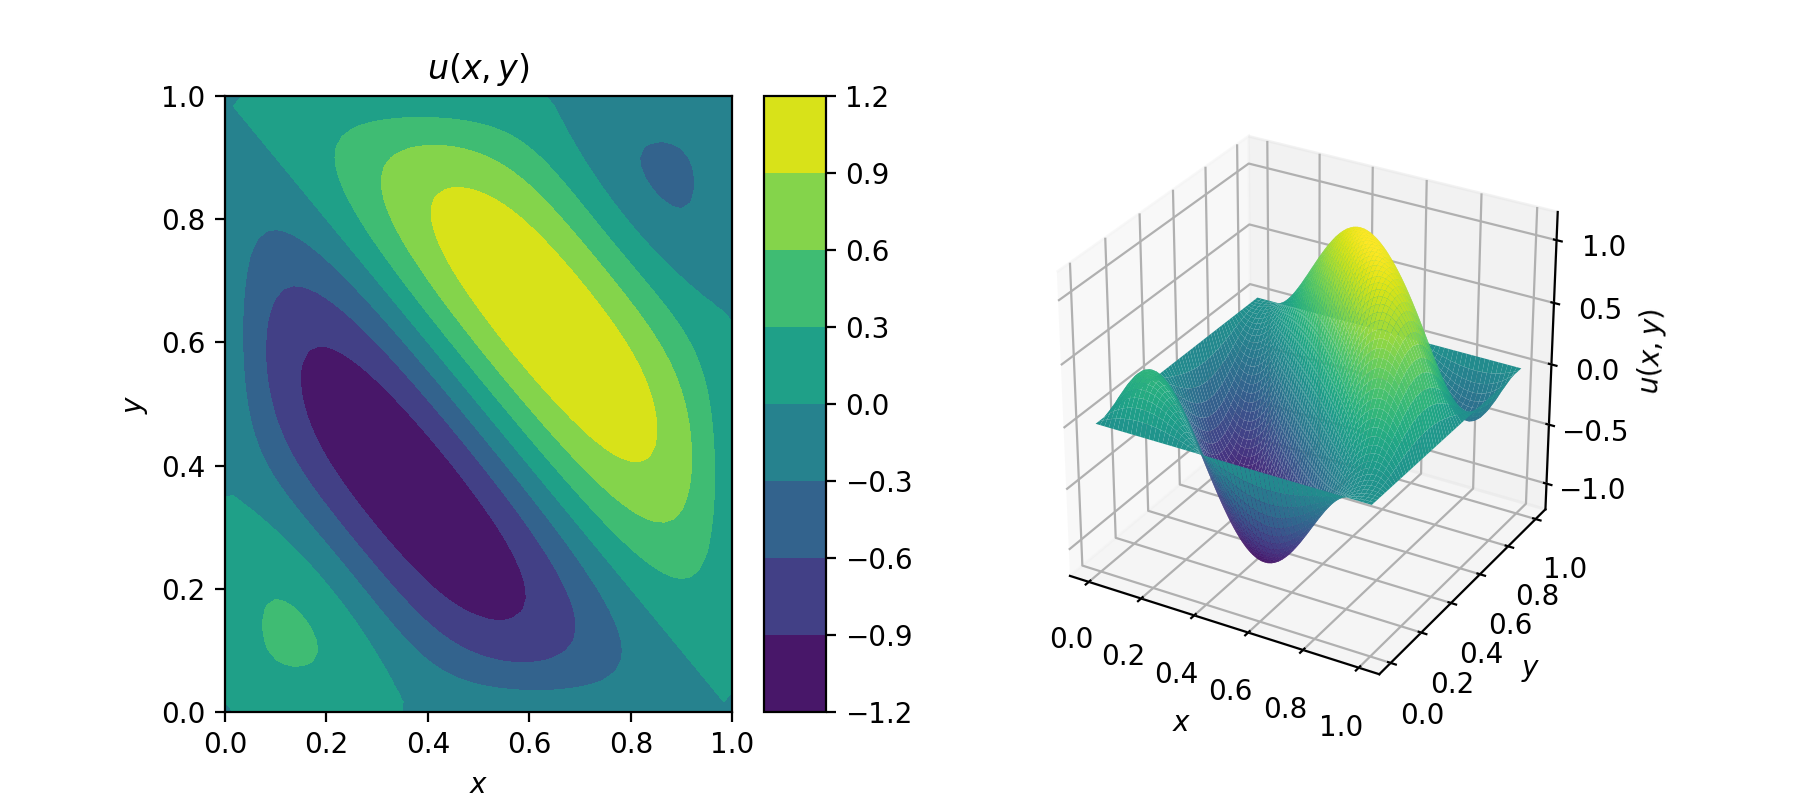

In [11]:
solution_matrix = post_process_solution(Lx, Ly, grid_points_x, grid_points_y, u, boundary_condition)

# Item A - Discretize Poisson Equation

## Generate Algebraic System - Matrix $A$ and vector $b$

In [7]:
A, b = assemble_algebraic_system(Lx, Ly, grid_points_x, grid_points_y, g, boundary_condition)

## Analyse Algebraic System Generated - Matrix $A$ and vector $b$

Matrix A:
[[-14400.   3600.      0. ...      0.      0.      0.]
 [  3600. -14400.   3600. ...      0.      0.      0.]
 [     0.   3600. -14400. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ... -14400.   3600.      0.]
 [     0.      0.      0. ...   3600. -14400.   3600.]
 [     0.      0.      0. ...      0.   3600. -14400.]]

Vector b:
[-16.41604911 -24.3990039  -32.1146381  ...  32.1146381   24.3990039
  16.41604911]


<IPython.core.display.Javascript object>


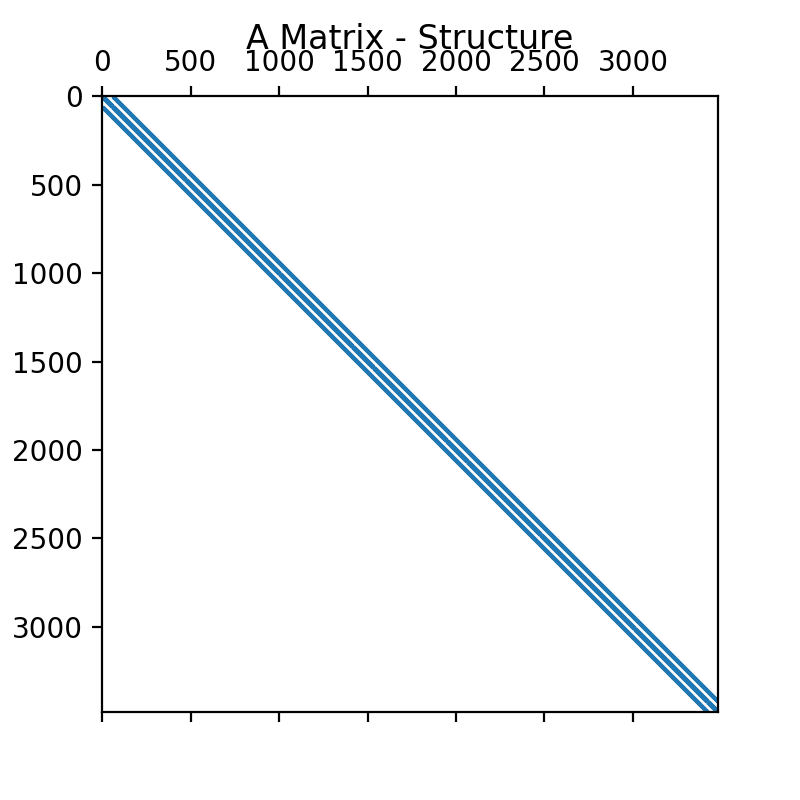

In [12]:
# Analyse A matrix
print("Matrix A:")
print(A.todense())

# Analyse b vector
print("\nVector b:")
print(b)

# Analyse A matrix structure
plt.figure(figsize=(4, 4))
plt.title("A Matrix - Structure")
plt.spy(A, markersize=0.1)
plt.show()

# Item B - Solve Algebraic System Using Direct Methods

## Solve Algebraic System $A \cdot u = b$ using LU Method

In [9]:
u_LU = solve_algebraic_system(A, b, method="LU_compiled") # Runs in about 1 min

## Solve Algebraic System $A \cdot u = b$ using QR Method

In [ ]:
u_QR = solve_algebraic_system(A, b, method="QR_compiled") # Runs in about 12 min

## Check if LU and QR Solutions are Equal

In [24]:
np.allclose(u_LU, u_QR, rtol=0, atol=1e-13)

True

## Plot Solution Obtained with LU Method

<IPython.core.display.Javascript object>


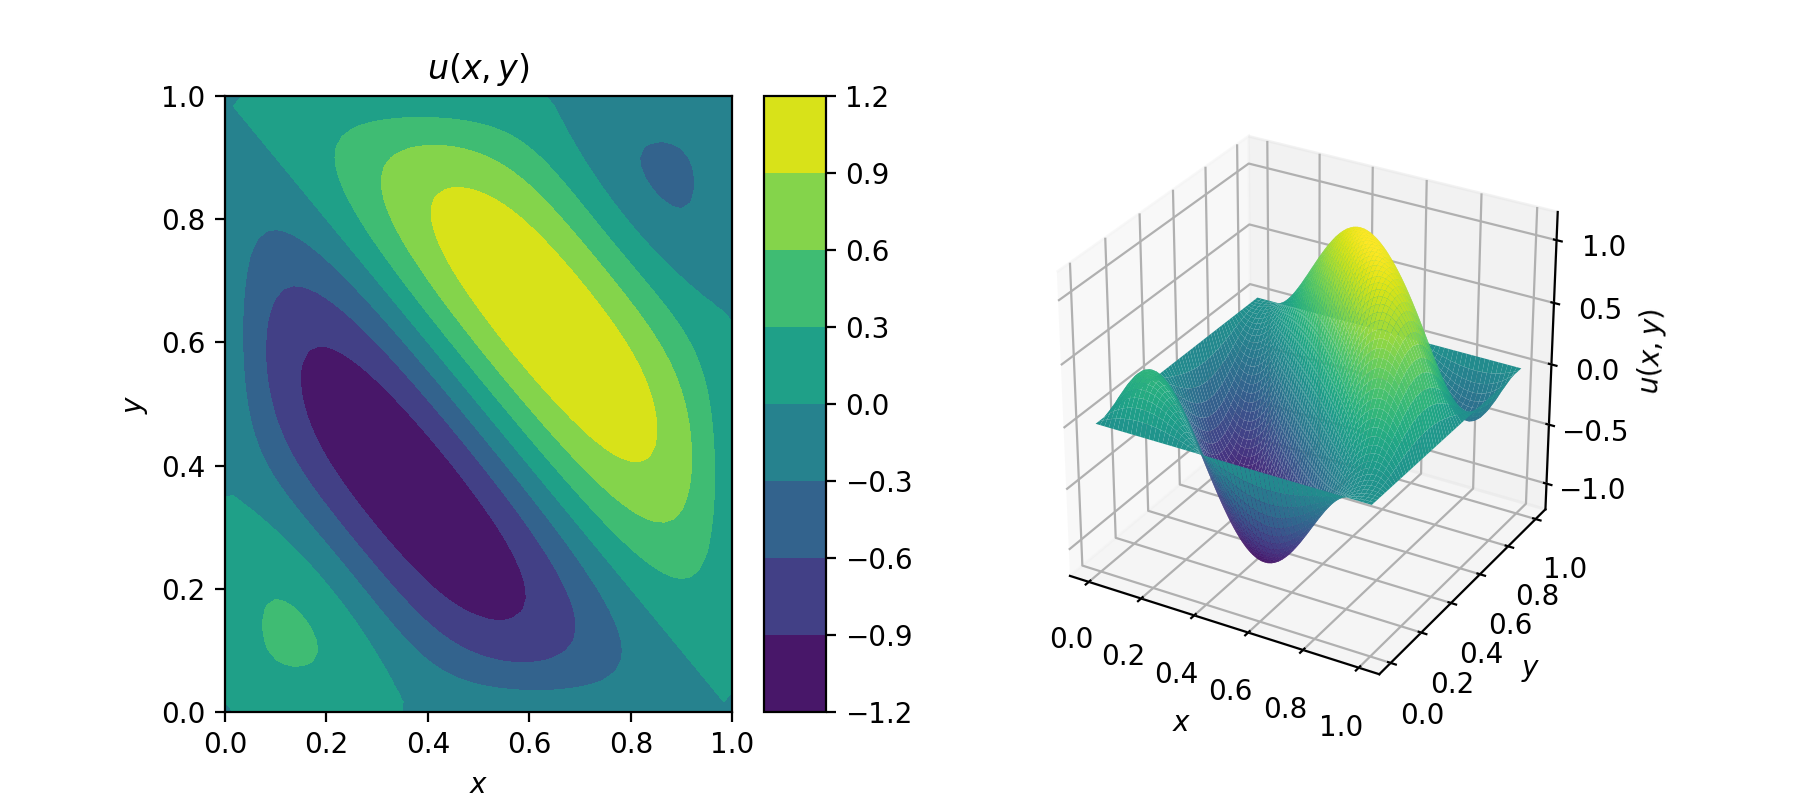

In [34]:
solution_matrix_LU = post_process_solution(Lx, Ly, grid_points_x, grid_points_y, u_LU, boundary_condition)

## Plot Solution Obtained with QR Method

<IPython.core.display.Javascript object>


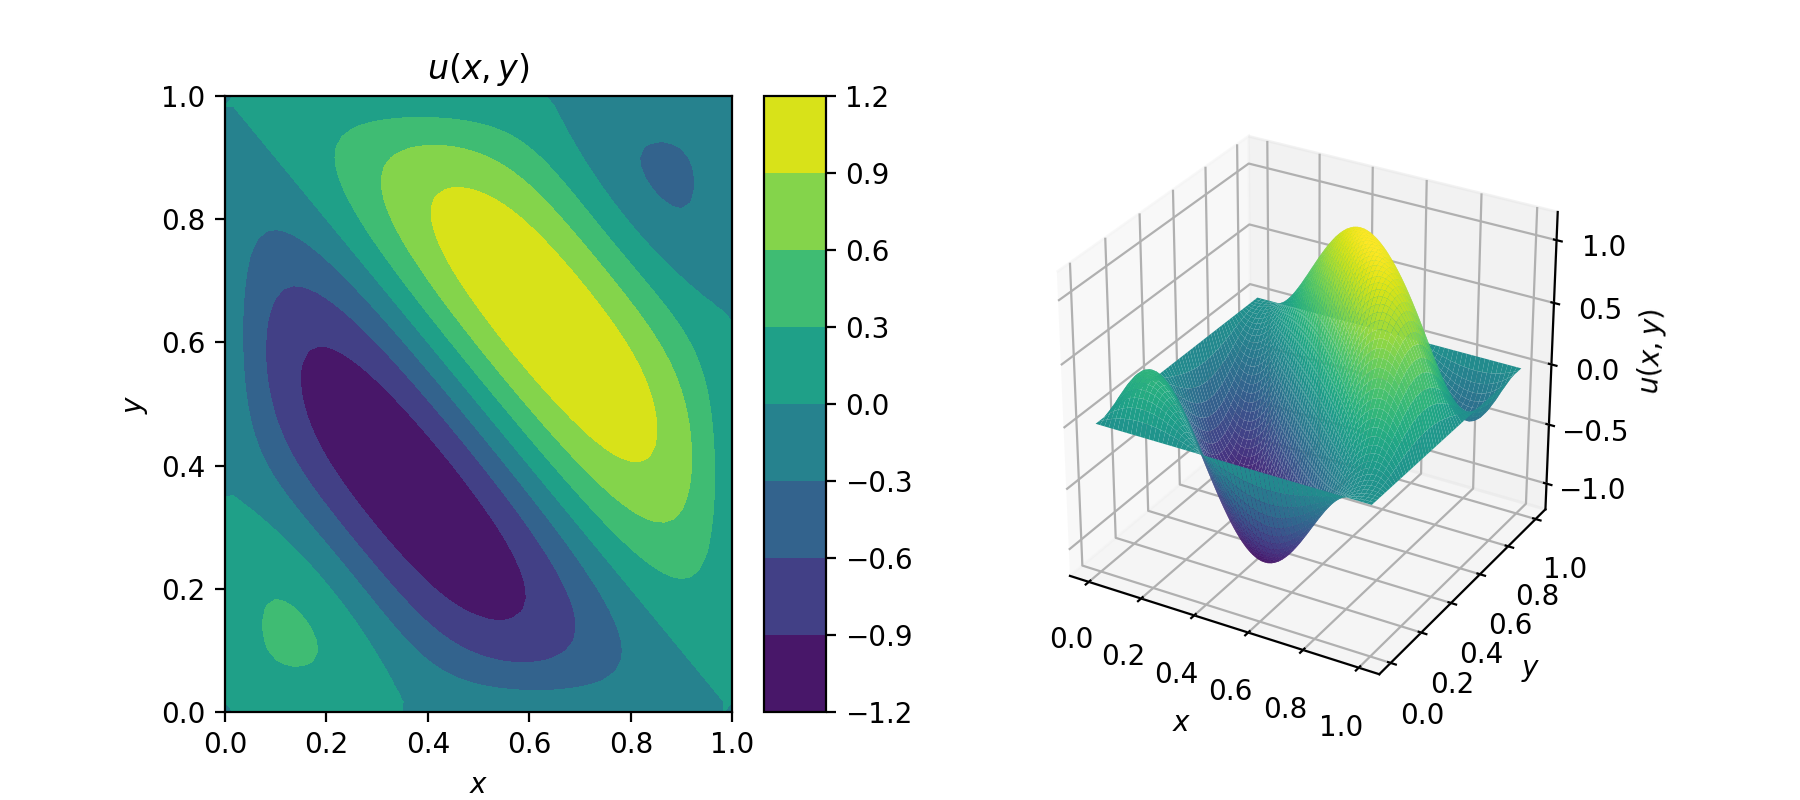

In [35]:
solution_matrix_QR = post_process_solution(Lx, Ly, grid_points_x, grid_points_y, u_QR, boundary_condition)

# Item C - Solve Algebraic System Using Iterative Methods

## Generate Random Initial Guess

In [37]:
u0 = np.random.randn(len(b), 1)

## Solve using Jacobi Method

In [38]:
u_jacabi, res_jacobi = solve_algebraic_system(A, b, method="jacobi_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)

## Solve using Gauss-Seidel Method

In [39]:
u_gauss_seidel, res_gauss_seidel = solve_algebraic_system(A, b, method="gauss_seidel_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)

## Solve using SOR Method - $\omega = 1.5$

In [40]:
u_sor_gs, res_sor_gs = solve_algebraic_system(A, b, method="sor_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7, w=1.5)

## Compare Iterative Methods

<IPython.core.display.Javascript object>


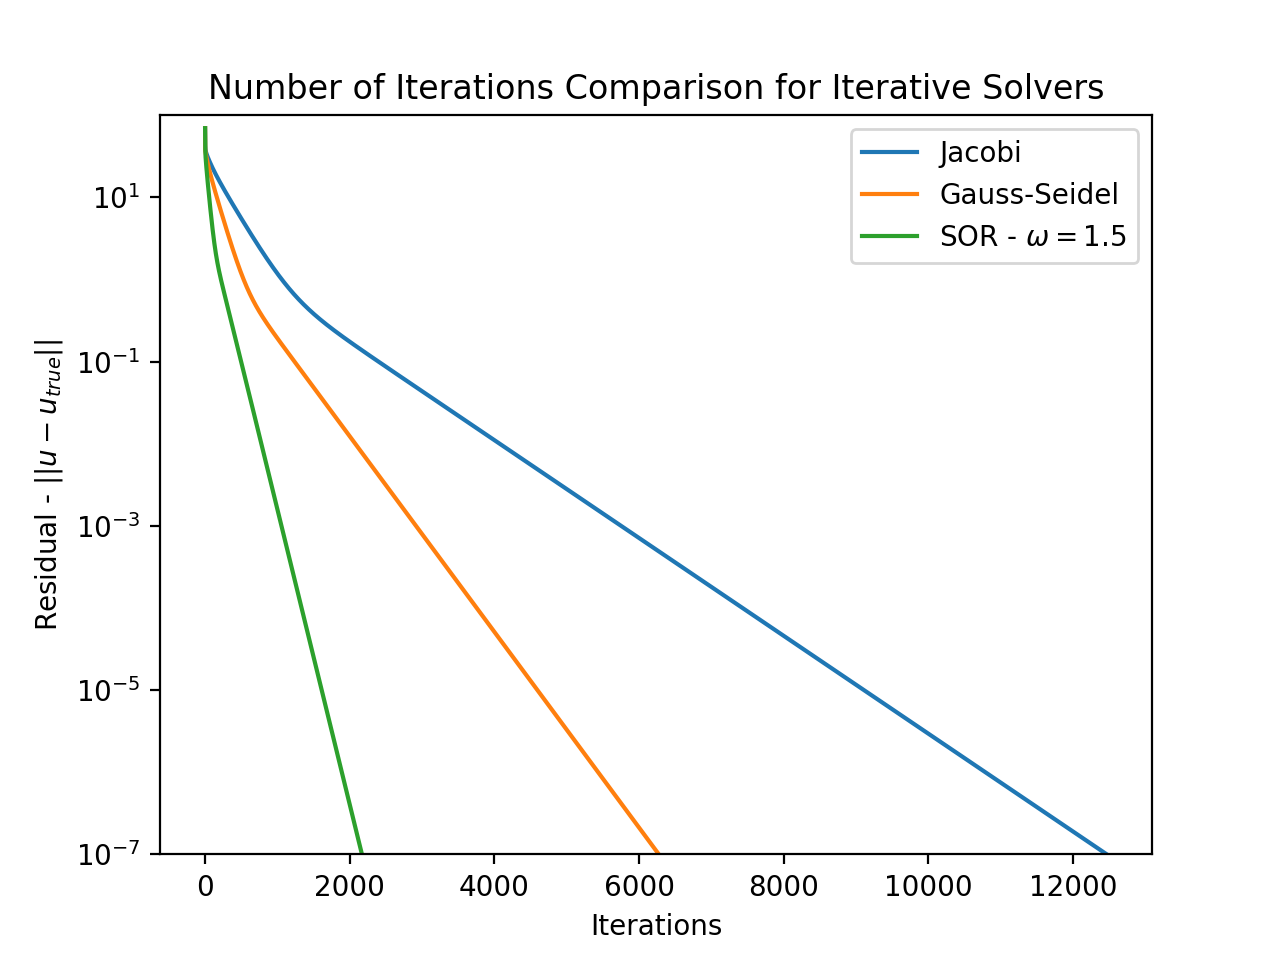

In [41]:
plt.figure()
jacobi, = plt.semilogy(res_jacobi, label='Jacobi')
gauss_seidel, = plt.semilogy(res_gauss_seidel, label='Gauss-Seidel')
sor_1_5, = plt.semilogy(res_sor_gs, label='SOR - $\omega=1.5$')
plt.legend(handles=[jacobi, gauss_seidel, sor_1_5])
plt.ylabel("Residual - $||u - u_{true}||$")
plt.xlabel("Iterations")
plt.ylim(1e-7, 1e2)
plt.title("Number of Iterations Comparison for Iterative Solvers")
plt.show()

## Compare SOR for Different $\omega$

In [42]:
# Generate Data
sor_data = []
for w in [0.4, 0.6, 0.8, 1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.85, 1.875, 1.9, 1.925, 1.95, 1.975, 1.98, 1.985, 1.99, 1.995, 1.999]:
    print("Init with w = {:4.3f}".format(w), end="\r")
    u_sor, res_sor = solve_algebraic_system(A, b, method="sor_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7, w=w)
    sor_data.append([w, u_sor, res_sor])
    print("Done with w = {:4.3f}".format(w), end="\r")

<IPython.core.display.Javascript object>


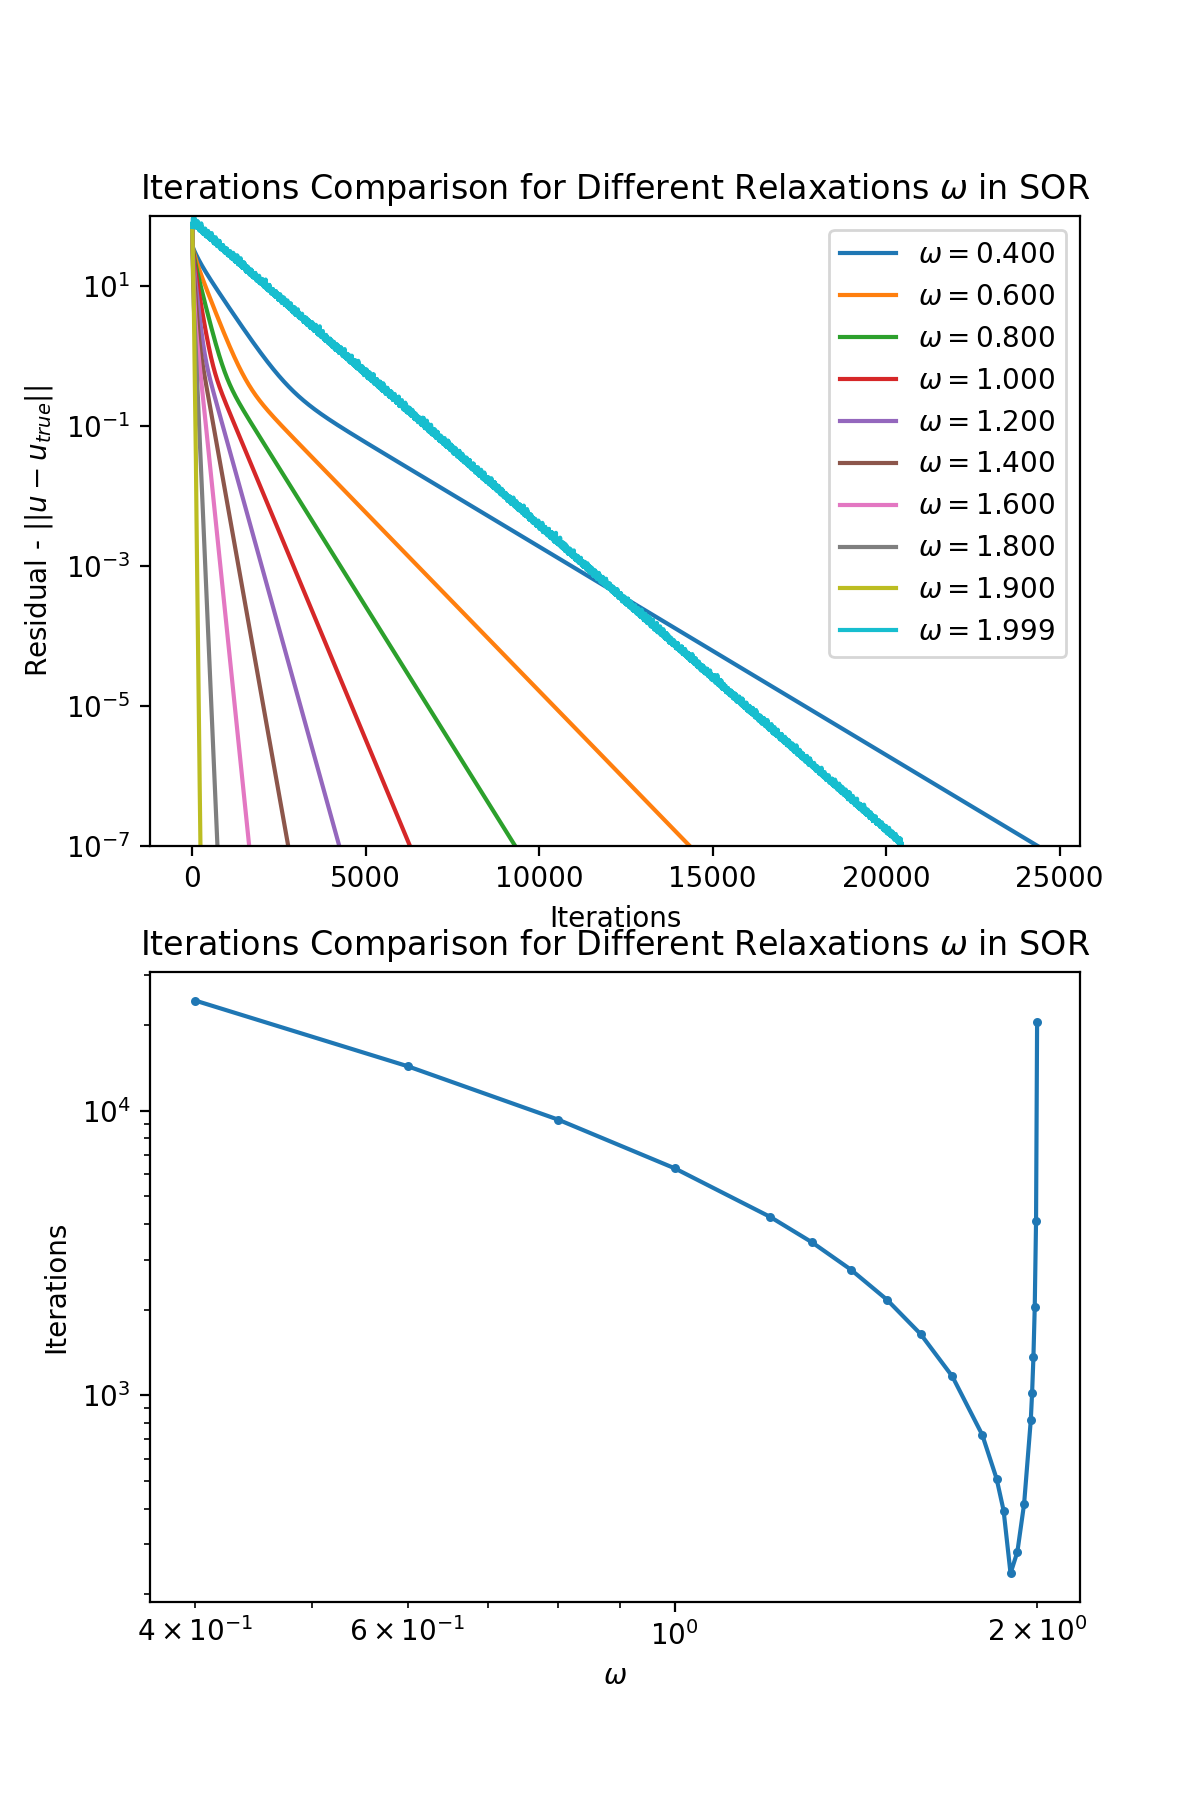

In [43]:
# Plot Data
plt.figure(figsize=(6, 9))
handles = []
plt.subplot(2, 1, 1)
for sor_result in sor_data:
    if sor_result[0] in [0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 1.9, 1.999]:
        handle, = plt.semilogy(sor_result[2], label='$\omega = {:04.3f}$'.format(sor_result[0]))
        handles.append(handle)
plt.legend(handles=handles)
plt.ylabel("Residual - $||u - u_{true}||$")
plt.xlabel("Iterations")
plt.ylim(1e-7, 1e2)
plt.title("Iterations Comparison for Different Relaxations $\omega$ in SOR")
plt.subplot(2, 1, 2)
plt.title("Iterations Comparison for Different Relaxations $\omega$ in SOR")
plt.xlabel("$\omega$")
plt.ylabel("Iterations")
plt.scatter([sor_result[0] for sor_result in sor_data], [len(sor_result[2]) for sor_result in sor_data], s=5)
plt.loglog([sor_result[0] for sor_result in sor_data], [len(sor_result[2]) for sor_result in sor_data])
plt.show()

## Theoritical Optimum $\omega$

In [44]:
w_opt = 2/(1 + np.sin(np.pi*dx))
print(w_opt)

1.9005337488803598


# Item D - Different Initial Guesses

## Compare Different Initial Guesses for Jacobi

In [21]:
# Generate Data
jac_data = []
for i in range(3):
    # Create random initial guess
    u0 = np.random.randn(len(b), 1)
    u_jac, res_jac = solve_algebraic_system(A, b, method="jacobi_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)
    jac_data.append(['Random ' + str(i), u0, u_jac, res_jac])

# Use differential equation solution as initial guess (not respecting boundary conditions)
dx = Lx/(grid_points_x - 1)
dy = Ly/(grid_points_y - 1)
x_mesh = np.arange(dx, Lx, dx)
y_mesh = np.arange(dy, Ly, dy)
X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
u0 = (np.sin(2*np.pi*(X_mesh+Y_mesh))).flatten()
u_jac, res_jac = solve_algebraic_system(A, b, method="jacobi_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)
jac_data.append(['Analytical Solution', u0, u_jac, res_jac])

# Use all zero as initial guess
u0 = 0*u0
u_jac, res_jac = solve_algebraic_system(A, b, method="jacobi_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)
jac_data.append(['Zero', u0, u_jac, res_jac])

<IPython.core.display.Javascript object>


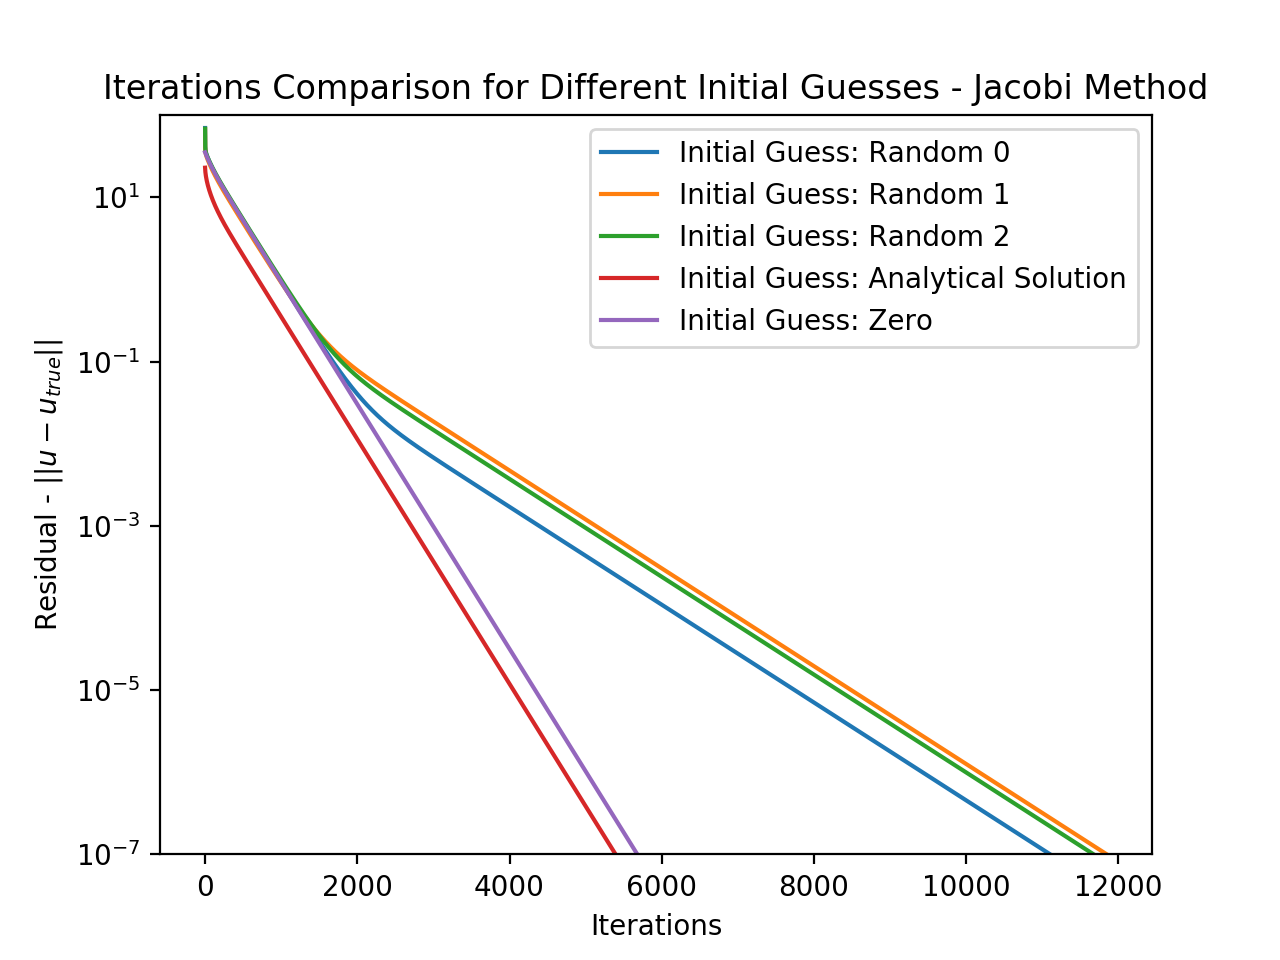

In [22]:
# Plot Data
plt.figure()
handles = []
for jac_result in jac_data:
    handle, = plt.semilogy(jac_result[3], label='Initial Guess: '+str(jac_result[0]))
    handles.append(handle)
plt.legend(handles=handles)
plt.ylabel("Residual - $||u - u_{true}||$")
plt.xlabel("Iterations")
plt.ylim(1e-7, 1e2)
plt.title("Iterations Comparison for Different Initial Guesses - Jacobi Method")
plt.show()

## Compare Different Initial Guesses for Gauss-Seidel

In [23]:
# Generate Data
gs_data = []
for i in range(4):
    # Create random initial guess
    u0 = np.random.randn(len(b), 1)
    u_gs, res_gs = solve_algebraic_system(A, b, method="gauss_seidel_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)
    gs_data.append(['Random ' + str(i), u0, u_gs, res_gs])

# Use differential equation solution as initial guess (not respecting boundary conditions)
dx = Lx/(grid_points_x - 1)
dy = Ly/(grid_points_y - 1)
x_mesh = np.arange(dx, Lx, dx)
y_mesh = np.arange(dy, Ly, dy)
X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
u0 = (np.sin(2*np.pi*(X_mesh+Y_mesh))).flatten()
u_gs, res_gs = solve_algebraic_system(A, b, method="gauss_seidel_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)
gs_data.append(['Analytical Solution', u0, u_gs, res_gs])

# Use all zero as initial guess
u0 = 0*u0
u_gs, res_gs = solve_algebraic_system(A, b, method="gauss_seidel_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)
gs_data.append(['Zero', u0, u_gs, res_gs])

<IPython.core.display.Javascript object>


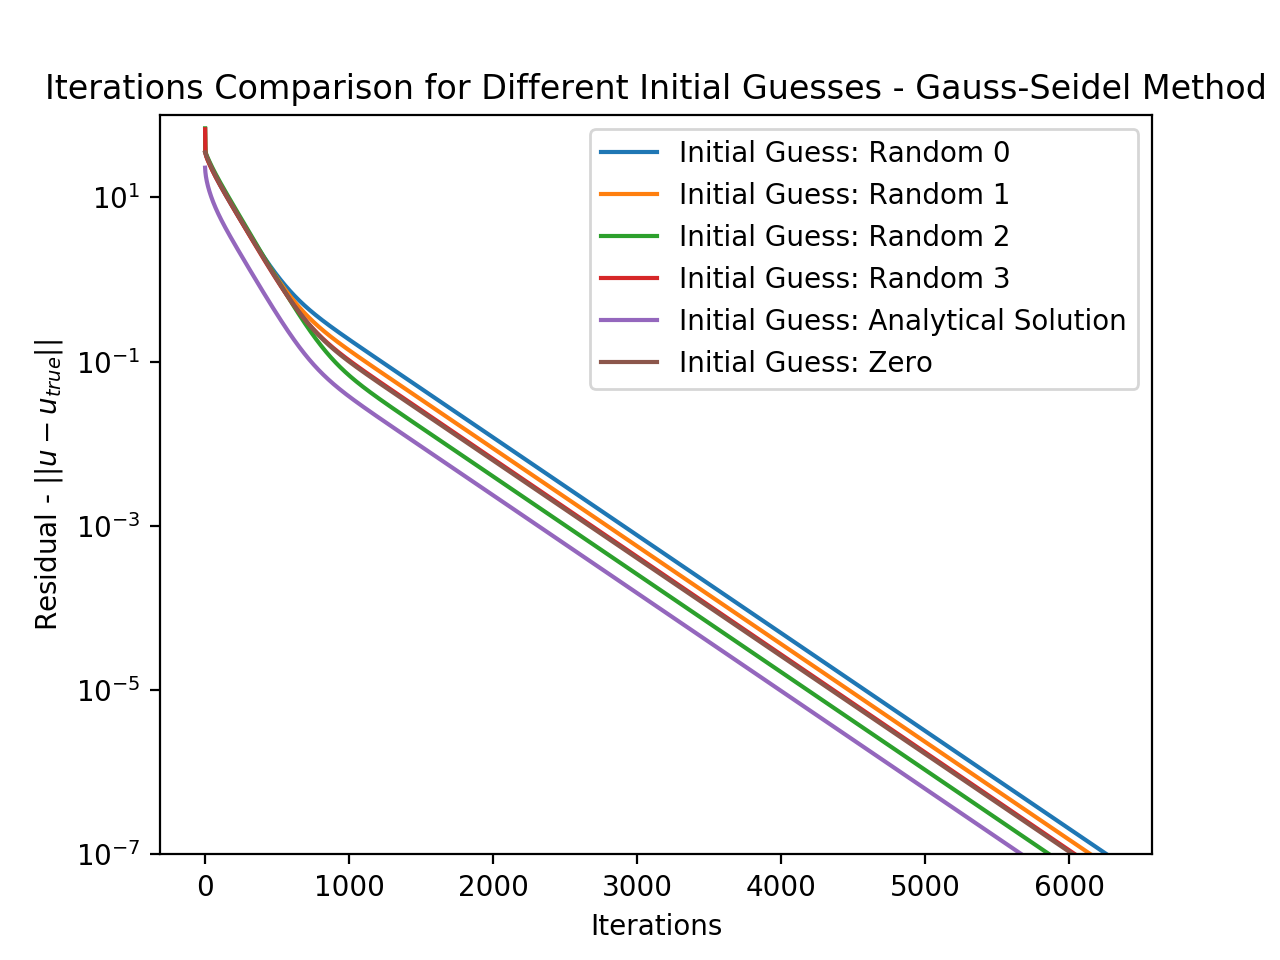

In [25]:
# Plot Data
plt.figure()
handles = []
for gs_result in gs_data:
    handle, = plt.semilogy(gs_result[3], label='Initial Guess: '+str(gs_result[0]))
    handles.append(handle)
plt.legend(handles=handles)
plt.ylabel("Residual - $||u - u_{true}||$")
plt.xlabel("Iterations")
plt.ylim(1e-7, 1e2)
plt.title("Iterations Comparison for Different Initial Guesses - Gauss-Seidel Method")
plt.show()

## Compare Different Initial Guesses for SOR

In [26]:
# Generate Data
sor_data2 = []
for i in range(4):
    # Create random initial guess
    u0 = np.random.randn(len(b), 1)
    u_sor, res_sor = solve_algebraic_system(A, b, method="sor_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7, w=1.9)
    sor_data2.append(['Random ' + str(i), u0, u_sor, res_sor])

# Use differential equation solution as initial guess (not respecting boundary conditions)
dx = Lx/(grid_points_x - 1)
dy = Ly/(grid_points_y - 1)
x_mesh = np.arange(dx, Lx, dx)
y_mesh = np.arange(dy, Ly, dy)
X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
u0 = (np.sin(2*np.pi*(X_mesh+Y_mesh))).flatten()
u_sor, res_sor = solve_algebraic_system(A, b, method="sor_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7, w=1.9)
sor_data2.append(['Analytical Solution', u0, u_sor, res_sor])

# Use all zero as initial guess
u0 = 0*u0
u_sor, res_sor = solve_algebraic_system(A, b, method="sor_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7, w=1.9)
sor_data2.append(['Zero', u0, u_sor, res_sor])

<IPython.core.display.Javascript object>


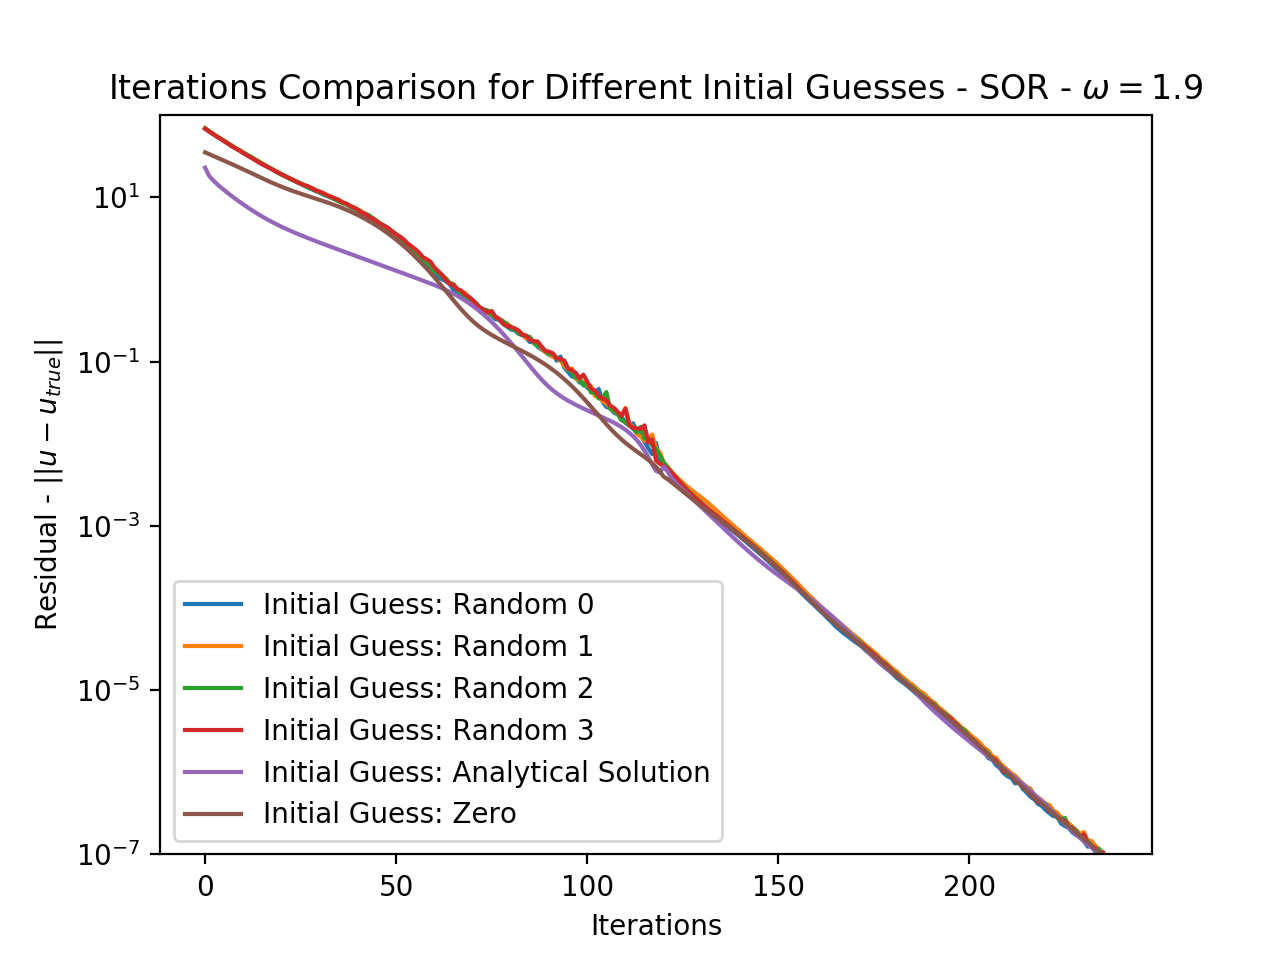

In [27]:
# Plot Data
plt.figure()
handles = []
for sor_result in sor_data2:
    handle, = plt.semilogy(sor_result[3], label='Initial Guess: '+str(sor_result[0]))
    handles.append(handle)
plt.legend(handles=handles)
plt.ylabel("Residual - $||u - u_{true}||$")
plt.xlabel("Iterations")
plt.ylim(1e-7, 1e2)
plt.title("Iterations Comparison for Different Initial Guesses - SOR - $\omega=1.9$")
plt.show()

# Item E - Verification of Order of Accuracy of FD Scheme Used

## Set New Boundary Condition

In [28]:
# Boundary condition
boundary_condition2 = lambda x, y: np.sin(2*np.pi*(x+y))

## Generate and Solve Algebraic System for Different Meshes

<IPython.core.display.Javascript object>


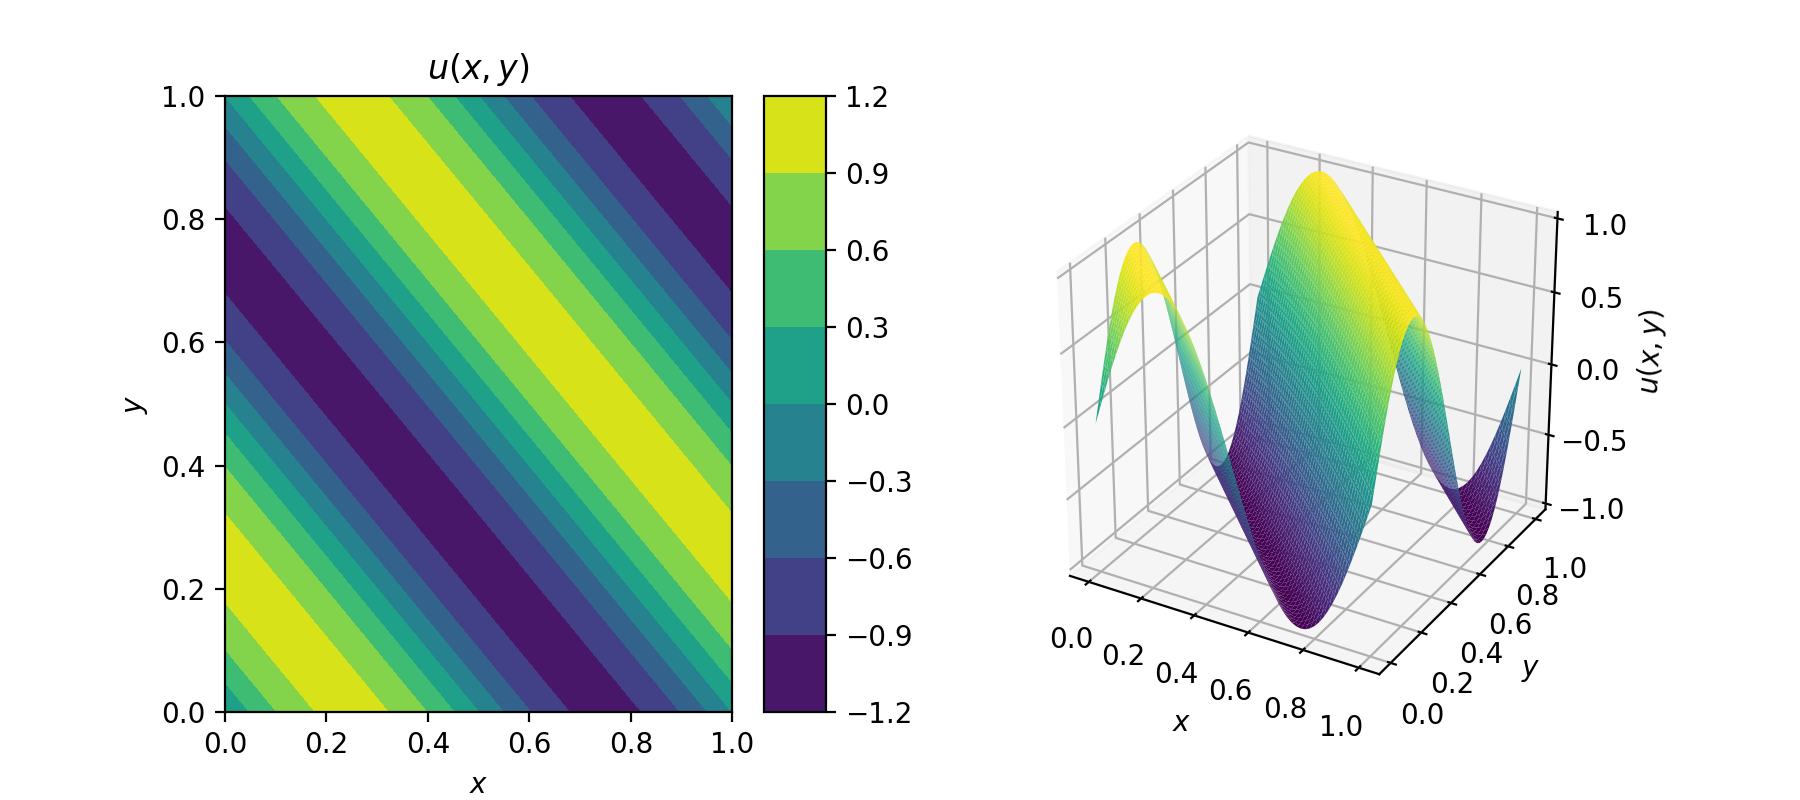

<IPython.core.display.Javascript object>


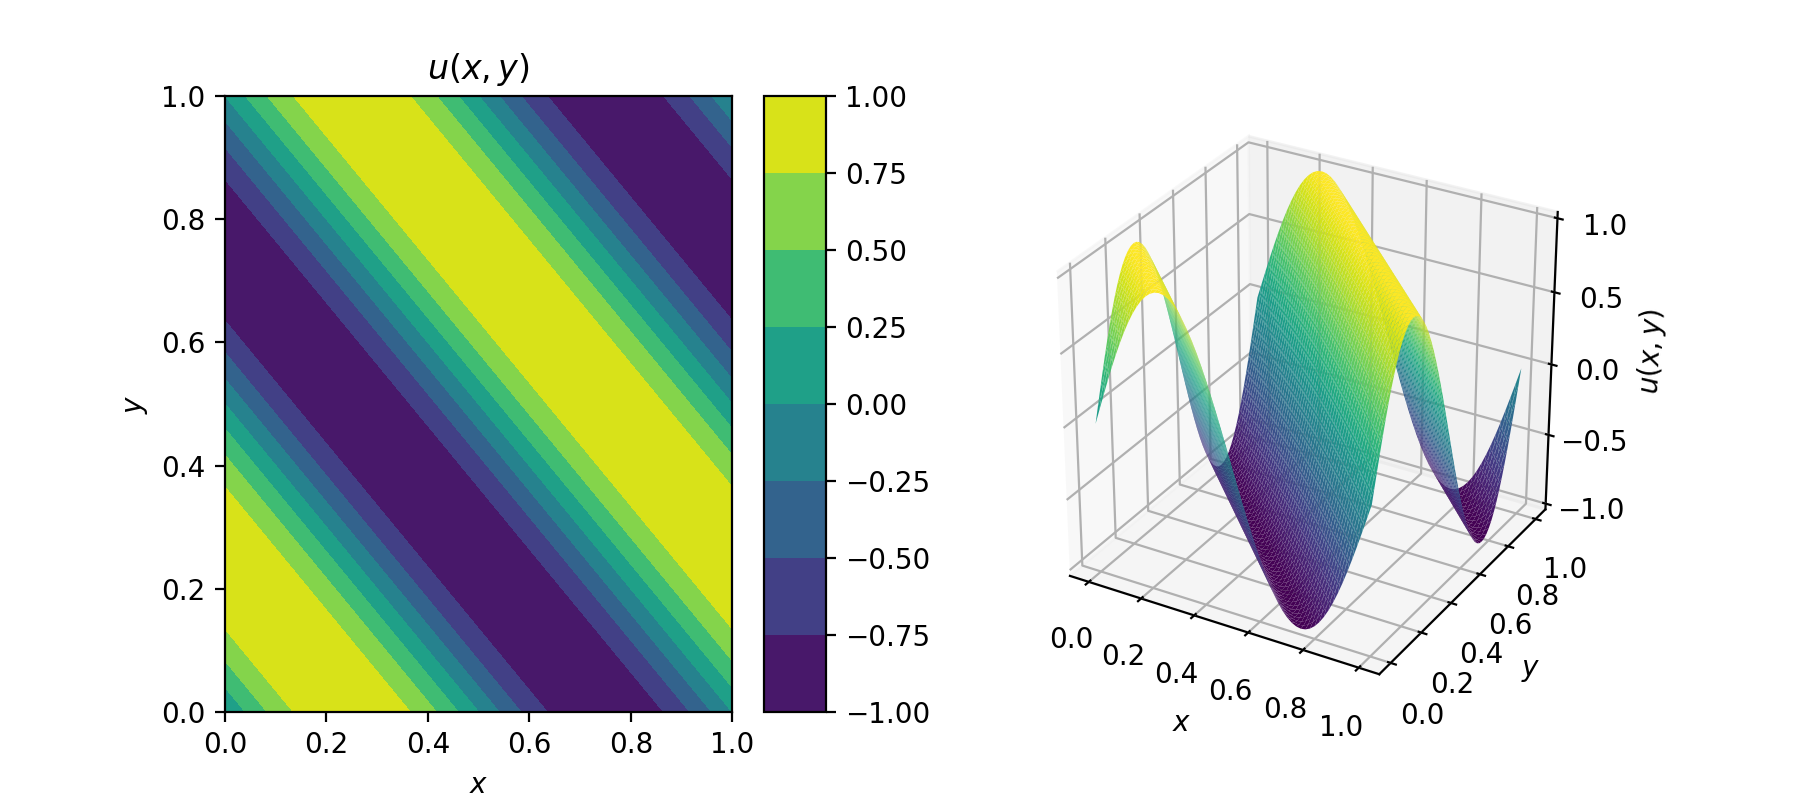

In [46]:
grid_points_set = [11, 21, 31, 41, 51, 61]

h_set = []
RL2_set = []

from poisson_equation_prepost import assemble_algebraic_system_slow

for grid_points in grid_points_set:
    # Assemble Algebraic System
    A, b = assemble_algebraic_system_slow(Lx, Ly, grid_points, grid_points, g, boundary_condition2)
    # Solve Algebraic System
    u = solve_algebraic_system(A, b, method="LU_sparse")
    solution_matrix = u.reshape((grid_points-2, grid_points-2))
    # Calculate Analytical Solution
    dx = Lx/(grid_points - 1)
    dy = Ly/(grid_points - 1)
    x_mesh = np.arange(dx, Lx, dx)
    y_mesh = np.arange(dy, Ly, dy)
    X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
    analitical_matrix = (np.sin(2*np.pi*(X_mesh+Y_mesh)))
    # Calculate RL2
    RL2 = (np.sum((solution_matrix - analitical_matrix)**2)/(grid_points**2))**0.5
    # Store result
    RL2_set.append(RL2)
    h_set.append(dx)
# Check with plots
numerical = post_process_solution(Lx, Ly, grid_points, grid_points, u, boundary_condition2)
analytical = post_process_solution(Lx, Ly, grid_points, grid_points, analitical_matrix.flatten(), boundary_condition2)

## Plot Results

<IPython.core.display.Javascript object>


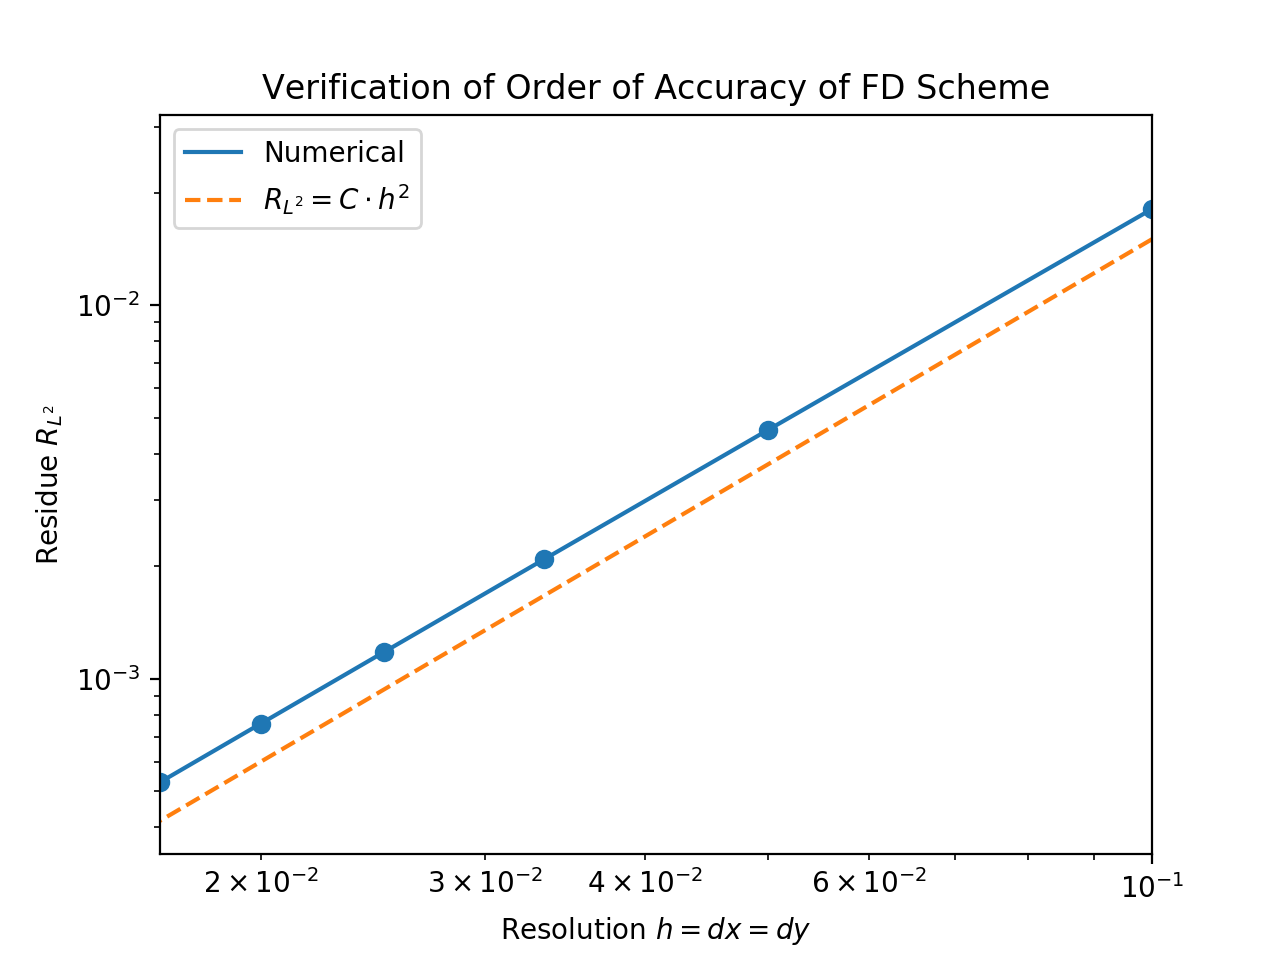

In [47]:
plt.figure()
plt.scatter(h_set, RL2_set)
result, = plt.loglog(h_set, RL2_set, label='Numerical')
prediction, = plt.loglog(h_set, 1.5*(np.array(h_set)**2), linestyle='--', label="$R_{L^2} = C \cdot h^2$")
plt.legend(handles=[result, prediction])
plt.xlim(h_set[-1], h_set[0])
plt.ylabel("Residue $R_{L^{2}}$")
plt.xlabel("Resolution $h=dx=dy$")
plt.title("Verification of Order of Accuracy of FD Scheme")
plt.show()

# Other Analysis

## Speed comparisons

In [14]:
n = 100
%timeit assemble_algebraic_system(Lx, Ly, n, n, g, boundary_condition)
%timeit assemble_algebraic_system_slow(Lx, Ly, n, n, g, boundary_condition)

355 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
27.8 ms ± 468 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
n = 61
A, b = assemble_algebraic_system(Lx, Ly, n, n, g, boundary_condition)
# print("LU - Own Implementation")
# %timeit -n 1 -r 1 solve_algebraic_system(A, b, method="LU")
print("\nLU Sparse - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="LU_sparse")
print("\nLU Compiled - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="LU_compiled")
print("\nLU Scipy Sparse - Scipy Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="LU_scipy_sparse")
# print("\nQR - Own Implementation")
# %timeit -n 1 -r 1 solve_algebraic_system(A, b, method="QR")
print("\nQR Compiled - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="QR_compiled")
print("\nQR Scipy - Scipy Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="QR_scipy")
# print("\nJacobi - Own Implementation")
# %timeit -n 1 -r 1 solve_algebraic_system(A, b, method="jacobi", initial_guess=u0, true_solution=u_LU, tol=1e-7)
print("\nJacobi Compiled - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="jacobi_compiled", initial_guess=u0, true_solution=u_LU, tol=1e-7)
print("\nJacobi Sparse - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="jacobi_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)
# print("\Gauss-Seidel - Own Implementation")
# %timeit -n 1 -r 1 solve_algebraic_system(A, b, method="gauss_seidel", initial_guess=u0, true_solution=u_LU, tol=1e-7)
print("\nGauss-Seidel Compiled - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="gauss_seidel_compiled", initial_guess=u0, true_solution=u_LU, tol=1e-7)
print("\nGauss-Seidel Sparse - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="gauss_seidel_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7)
# print("\nSOR - Own Implementation")
# %timeit -n 1 -r 1 solve_algebraic_system(A, b, method="sor", initial_guess=u0, true_solution=u_LU, tol=1e-7, w=1.5)
print("\nSOR Compiled - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="sor_compiled", initial_guess=u0, true_solution=u_LU, tol=1e-7, w=1.5)
print("\nSOR Sparse - Own Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="sor_sparse", initial_guess=u0, true_solution=u_LU, tol=1e-7, w=1.5)
print("\nScipy - Scipy Implementation")
%timeit -n 1 -r 1 solve_algebraic_system(A, b, method="scipy")


LU Sparse - Own Implementation
3min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

LU Compiled - Own Implementation
1min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

LU Scipy Sparse - Scipy Implementation
58.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

QR Compiled - Own Implementation
11min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

QR Scipy - Scipy Implementation
11.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Jacobi Compiled - Own Implementation
2min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Jacobi Sparse - Own Implementation
266 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Gauss-Seidel Compiled - Own Implementation
2min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Gauss-Seidel Sparse - Own Implementation
22.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

SOR Compiled - Own Implementation
37 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1